# **Analyzing Precipitation Patterns in Seattle and Portland**

This project explores the question: **Does it rain more in Seattle or in Portland**?

In this analysis, we will use daily precipitation data from the **National Centers for Environmental Information (NOAA)** for the years 2018–2022 to compare rainfall patterns between these two cities.  (link is provided below)

We will:
- Explore and clean the datasets.
- Handle missing values.
- Generate visualizations and draw observations.
- Compare rainfall frequency and total rainfall intensity between the two cities.

By the end of this project, we will determine which city is wetter overall, "Seattle" or "Portland", based on total amount precipitation.

---

Importing necessary libraires : pandas,numpy,seaborn and matplotlib.


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ploting style
sns.set_theme(style="whitegrid")

print("Libraries imported")

Libraries imported


We will start by loading the precipitation data of the cities (Seattle & Portland).

The below precipitation data sets were downloaded from the National Centers for Environmental Information NOAA [Climate online data tool.](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND)

In [116]:
# Seattle data
df_seattle = pd.read_csv("https://raw.githubusercontent.com/brian-fischer/DATA-5100/refs/heads/main/weather/seattle_rain.csv")

# Portland data
df_portland = pd.read_csv("https://raw.githubusercontent.com/anushkanaidu/Weather-Data-Project/refs/heads/main/weather/portland_rainfall.csv")


## Cleaning & Exploring the Precipitation Data!

As a part of data exploration, I checked the dataset’s info, shape, columns, unique stations, and date columns.
I removed some of the code cells used for this inspection to keep the notebook cleaner, but these steps were performed to ensure the data was complete, consistent, and ready for analysis.

One of the steps during data cleaning was verifying that the dataset includes the complete date range, starting from January 1, 2018, and ending on December 31, 2022.

In [ ]:
df_seattle['DATE']
df_portland['DATE']

,DATE
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1784,2022-12-27
1785,2022-12-28
1786,2022-12-29
1787,2022-12-30


The above date format for both cities appears to be inconsistent.
Let's fix that!

In [ ]:
# To maintain consistency in dates
df_seattle["DATE"] = pd.to_datetime(df_seattle["DATE"])
df_portland["DATE"] = pd.to_datetime(df_portland["DATE"])

# Check result
print(df_seattle["DATE"].head())
print(df_portland["DATE"].head())

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: DATE, dtype: datetime64[ns]
0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: DATE, dtype: datetime64[ns]


/tmp/ipython-input-4106308498.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle["DATE"] = pd.to_datetime(df_seattle["DATE"])


Now that we have all the data in the right format, let's plot some graphs to make some observations.

 - **Seattle precipitation across 5 years**

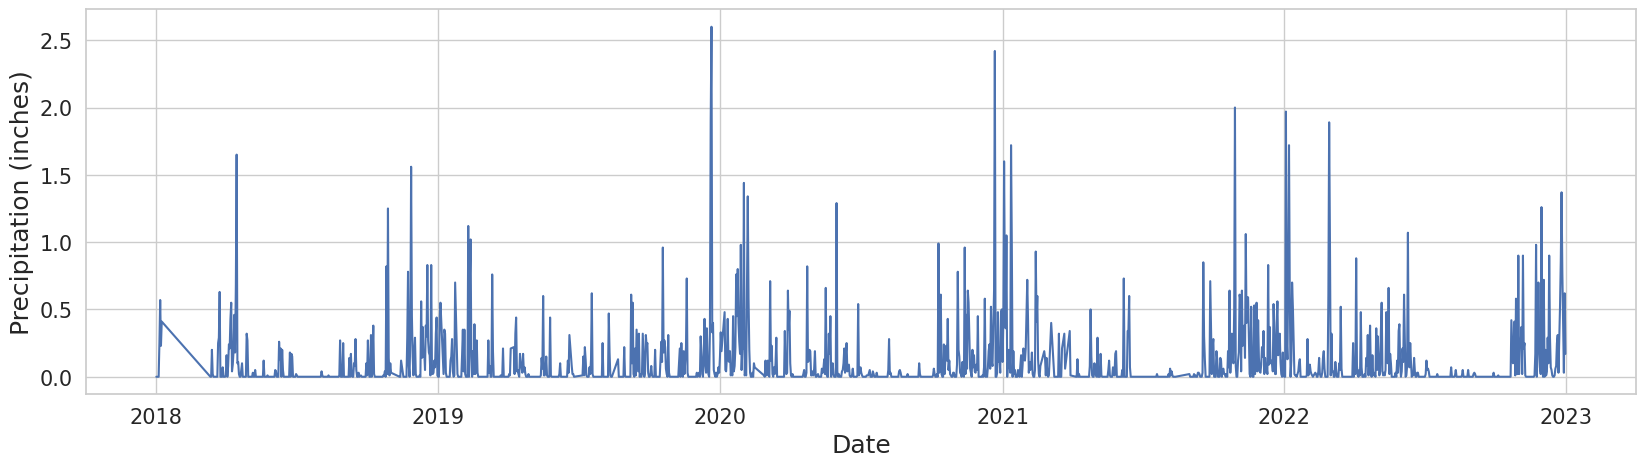

In [ ]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

 - **Portland precipitation across 5 years**

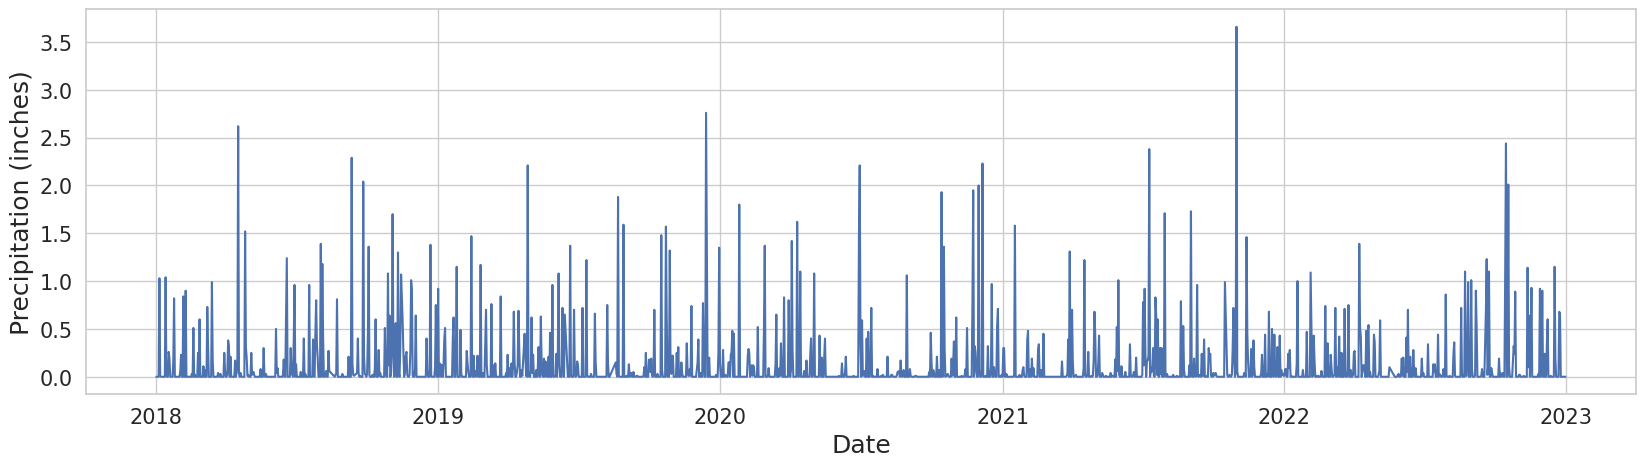

In [ ]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_portland, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

Here, we keep only the important parts of each city’s dataset which include the station, the date, and the precipitation amount.

This ensures we focus on just the dates and rainfall amounts needed for comparison.

In [ ]:
df_seattle.iloc[:, [0, 2, 5]] # for seattle dataset

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25
...,...,...,...
1653,US1WAKG0225,2022-12-27,0.78
1654,US1WAKG0225,2022-12-28,0.40
1655,US1WAKG0225,2022-12-29,0.03
1656,US1WAKG0225,2022-12-30,0.62


In [ ]:
df_portland.iloc[:, [0, 2, 5]] #for portland dataset

,STATION,DATE,PRCP
0,US1MECM0018,2018-01-01,0.00
1,US1MECM0018,2018-01-02,0.00
2,US1MECM0018,2018-01-03,0.00
3,US1MECM0018,2018-01-04,0.00
4,US1MECM0018,2018-01-05,1.03
...,...,...,...
1784,US1MECM0018,2022-12-27,0.00
1785,US1MECM0018,2022-12-28,0.00
1786,US1MECM0018,2022-12-29,0.00
1787,US1MECM0018,2022-12-30,0.00


Next, we merge the selected columns from the Seattle and Portland datasets.
An outer join is applied to ensure that all dates appearing in either dataset are included, even if one city has missing data for a particular day.  
*(An outer join keeps every record from both datasets which means, even if a date exists in Seattle’s data but not in Portland’s or vice versa, it will still appear in the merged dataset, with empty cells (NaN) where data is missing.)*

In [ ]:
df_merged = pd.merge(df_seattle[['DATE', 'PRCP']], df_portland[['DATE', 'PRCP']], on='DATE', how='outer', suffixes=('_seattle', '_portland'))
display(df_merged.head())

,DATE,PRCP_seattle,PRCP_portland
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.00,0.00
4,2018-01-05,0.25,1.03


Reshaping the merged data from a wide format to a long format for easier analysis and visualization.

In [ ]:
df = pd.melt(df_merged, id_vars='DATE', var_name='city', value_name='precipitation')
display(df.head())

,DATE,city,precipitation
0,2018-01-01,PRCP_seattle,0.00
1,2018-01-02,PRCP_seattle,0.00
2,2018-01-03,PRCP_seattle,0.00
3,2018-01-04,PRCP_seattle,0.00
4,2018-01-05,PRCP_seattle,0.25


Checking for any missing values in the combined and reshaped dataset.

- Here in this step, we look for missing data in the merged dataset. Missing values (shown as NaN) can happen when one city doesn’t have a record for a specific date.

In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
DATE             0
city             0
precipitation    0
dtype: int64


From the output above, we can see that date and city have no missing values, but the precipitation column has **231** missing entries. This means some days didn’t have rainfall data recorded. We can fix this by filling in those missing values with mean precipitation of the respective cities.

In [ ]:
#for seattle
mean_precipitation_seattle = df[df['city'] == 'PRCP_seattle']['precipitation'].mean()
df.loc[df['city'] == 'PRCP_seattle', 'precipitation'] = df[df['city'] == 'PRCP_seattle']['precipitation'].fillna(mean_precipitation_seattle)

#for portland
mean_precipitation_portland = df[df['city'] == 'PRCP_portland']['precipitation'].mean()
df.loc[df['city'] == 'PRCP_portland', 'precipitation'] = df[df['city'] == 'PRCP_portland']['precipitation'].fillna(mean_precipitation_portland)

#Lets check if it worked

print("Missing values:")
print(df.isnull().sum())

Missing values:
DATE             0
city             0
precipitation    0
dtype: int64


Now that we combined, reshaped, cleaned and even filled any missing values we should export the clean dataframe set.

In [ ]:
# Export the cleaned DataFrame to a CSV file
df.to_csv('cleaned_precipitation_data.csv', index=False)

print("Cleaned data exported to 'cleaned_precipitation_data.csv'")

Cleaned data exported to 'cleaned_precipitation_data.csv'


### **Clean data is now updated!**
---

Now that we have the clean data, let's work with it and make graphs and plots to make some observations.

Let us start visualizing the clean data!

### **1. Mean Daily Precipitation**

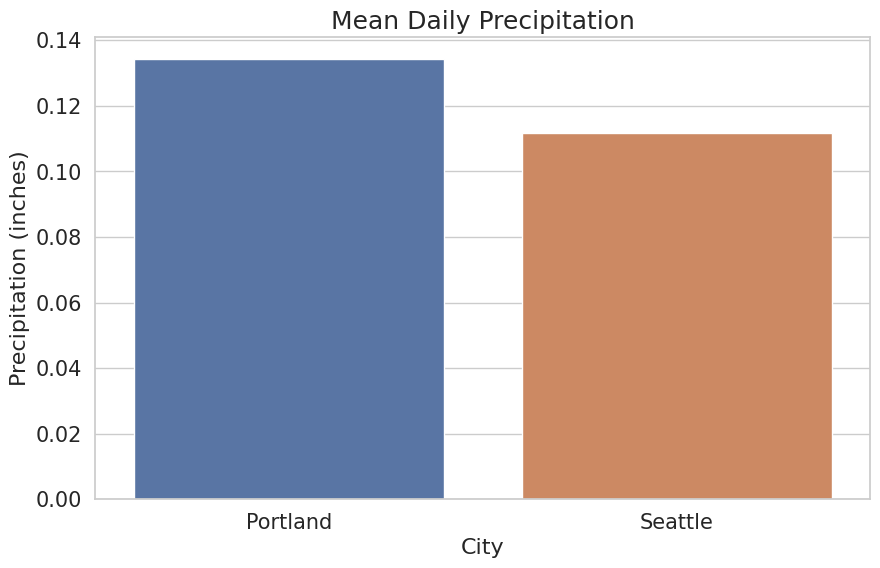

In [115]:
# Let us first calculate the mean precipitation for each city
mean_precipitation = df_cleaned.groupby('city')['precipitation'].mean().reset_index()

#plotting a bargraph
plt.figure(figsize=(10, 6))
sns.barplot(data = mean_precipitation, x ='city', y ='precipitation', hue ='city')

plt.ylabel('Precipitation (inches)', fontsize = 16)
plt.xlabel('City', fontsize = 16)
plt.title('Mean Daily Precipitation', fontsize = 18)

# x-axis labels
plt.xticks(ticks =[0, 1], labels =['Portland', 'Seattle'])
plt.tick_params(labelsize=15)

plt.show()

**Interpretation 1:**

The bar graph above compares the average daily precipitation (in inches) between Portland and Seattle.  
The results show that **Portland records higher mean daily precipitation** (0.13–0.14 inches) compared to **Seattle** (0.11 inches).  
This indicates that Portland experiences **slightly heavier rainfall on average**, while Seattle’s precipitation is **more evenly distributed throughout the year**.  


### **2. Monthly Mean Precipitation**

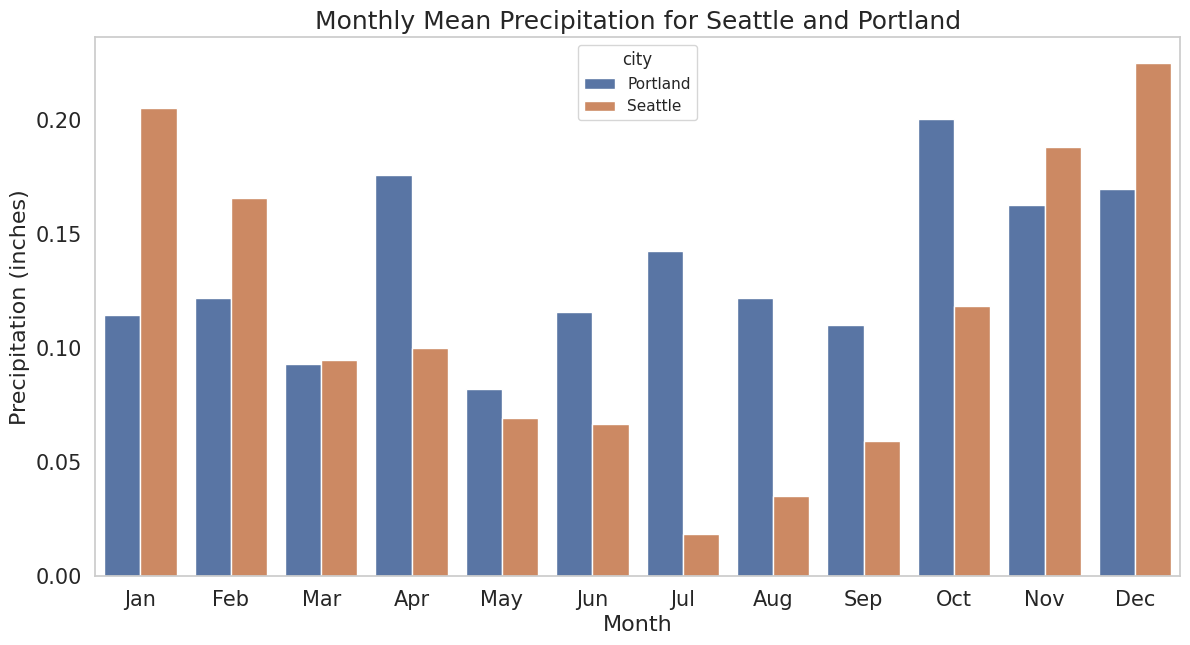

In [111]:
#monthly mean for both the cities
monthly_mean_precipitation = df_cleaned.groupby(['month', 'city'])['precipitation'].mean().reset_index()

#city names for legend
monthly_mean_precipitation['city'] = monthly_mean_precipitation['city'].replace({'PRCP_seattle': 'Seattle', 'PRCP_portland': 'Portland'})

#plotting a monthly bar graph
month_names = { 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

monthly_mean_precipitation['month_name'] = monthly_mean_precipitation['month'].map(month_names)

plt.figure(figsize=(14, 7))

sns.barplot(data=monthly_mean_precipitation, x='month_name', y='precipitation', hue='city')

plt.title('Monthly Mean Precipitation for Seattle and Portland', fontsize=18)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Precipitation (inches)', fontsize=16)
plt.tick_params(labelsize=15)
plt.grid(axis='y')

plt.show()

**Interpretation 2:**

From the chart, it is evident that Portland receives more rainfall on average each month compared to Seattle. The difference is most noticeable during the winter months, when Portland’s precipitation levels rise sharply. Seattle shows smaller fluctuations, indicating a more stable rainfall pattern throughout the year. Overall, Portland’s climate is wetter and more variable, while Seattle experiences moderate but consistent precipitation.

---

## **3. Proportion of days with Precipition for both the cities**

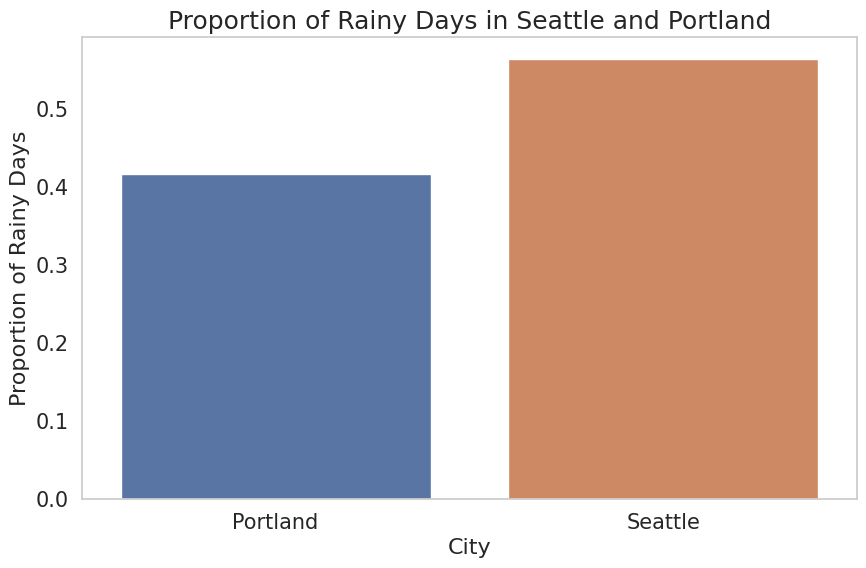

In [112]:
# Filter for days with precipitation greater than 0
df_rainy_days = df_cleaned[df_cleaned['precipitation'] > 0]

# Count the number of rainy days and the total number of days for each city.
rainy_day_counts = df_rainy_days.groupby('city').size().reset_index(name='rainy_days')
total_day_counts = df_cleaned.groupby('city').size().reset_index(name='total_days')

#plotting a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data = df_proportion, x='city', y='proportion', hue='city')

plt.title('Proportion of Rainy Days in Seattle and Portland', fontsize=18)
plt.xlabel('City', fontsize=16)
plt.ylabel('Proportion of Rainy Days', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Portland', 'Seattle'])
plt.tick_params(labelsize=15)

plt.grid(axis='y')

plt.show()

**Interpretation 3:**

The proportion of rainy days in Portland is approximately 0.416, while in Seattle it is approximately 0.563.

Hence, we can conclude Seattle experiences a significantly higher proportion of rainy days compared to Portland.

---

## 🌧️ Conclusion

Based on the analysis of precipitation data for **Seattle** and **Portland** from **2018 to 2022**, we can draw the following conclusions:

- **Total Rainfall:**  
  Portland received more total rainfall than Seattle during this period.

- **Frequency vs. Intensity:**  
  Seattle experienced rain on more days overall, but the rainfall was usually lighter.  
  In contrast, Portland had fewer rainy days, but when it rained, the precipitation was heavier on average.

- **Seasonal Patterns:**  
  Both cities showed clear seasonal trends where it rained more during the winter months and less during the summer.  
  However, Portland had higher rainfall peaks during the wet season compared to Seattle.

**In summary:**  
Seattle tends to have rain more often but in smaller amounts, while Portland has fewer rainy days with heavier rainfall, leading to a higher total precipitation overall.
